In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/ISSI - Sheet1.csv" , delimiter=",")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,1212.0
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,685780352.0
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,981171328.0
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,1604.0
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,1138.0


In [3]:
df.shape

(2683, 5)

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,2683.000000,2683.000000,2683.000000,2683.00000,2.540000e+03
mean,164.717738,165.603645,163.695785,164.68262,9.044931e+08
std,21.056260,20.998957,21.102087,21.01580,1.622198e+09
min,106.640000,108.030000,103.690000,106.64000,0.000000e+00
25%,147.310000,148.080000,146.450000,147.32500,0.000000e+00
50%,169.130000,170.310000,168.260000,169.18000,0.000000e+00
75%,182.460000,183.515000,181.550000,182.53000,1.023097e+09
max,209.750000,210.320000,208.750000,209.31000,9.467919e+09


drop kolom volume

In [5]:
df.sample(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-03 15:00:00,178.41,180.55,178.41,180.55,0.000000e+00
2021-09-08 15:00:00,174.96,175.08,171.54,172.36,0.000000e+00
2019-04-12 15:00:00,187.68,188.93,187.38,187.88,0.000000e+00
2012-11-05 15:00:00,145.97,146.97,145.38,145.97,9.505647e+08
2020-05-19 15:00:00,140.83,142.97,140.85,141.63,0.000000e+00
2014-12-03 15:00:00,166.37,167.50,166.14,166.37,4.228752e+09
2014-10-23 15:00:00,163.77,164.00,162.85,163.77,3.305052e+09
2017-02-01 15:00:00,173.25,173.85,173.01,173.32,0.000000e+00
2018-05-24 15:00:00,174.76,178.55,174.75,178.30,0.000000e+00


In [6]:
df.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume    143
dtype: int64

In [7]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

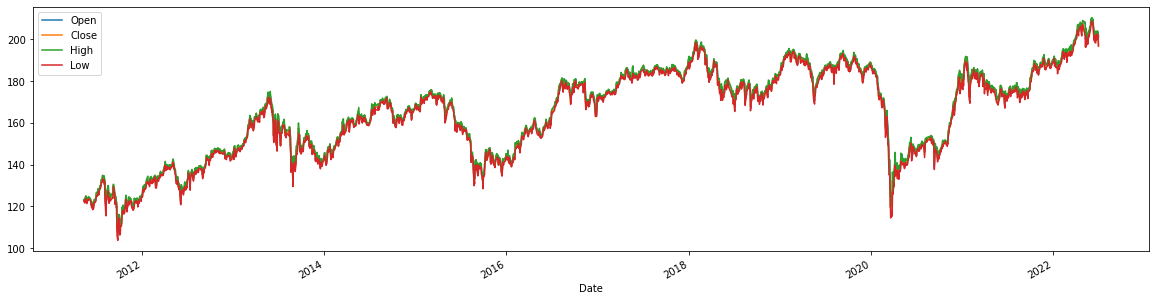

In [8]:
df["Open"].plot(figsize=(20, 5))
df["Close"].plot(figsize=(20, 5))
df["High"].plot(figsize=(20, 5))
df["Low"].plot(figsize=(20, 5))
plt.legend()

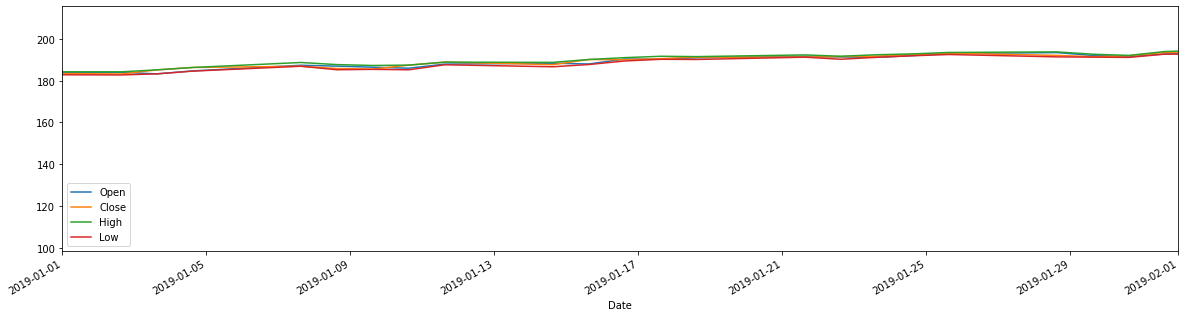

In [9]:
df["Open"].plot(figsize=(20, 5))
df["Close"].plot(figsize=(20, 5))
df["High"].plot(figsize=(20, 5))
df["Low"].plot(figsize=(20, 5))
plt.xlim("2019-01-01", "2019-02-01")
plt.legend()

In [10]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,1212.0
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,685780352.0
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,981171328.0
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,1604.0
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,1138.0


In [11]:
df.drop(["Volume"], axis=1, inplace=True)

In [12]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.998992,0.998800,0.998538
High,0.998992,1.000000,0.998504,0.998797
Low,0.998800,0.998504,1.000000,0.999037
Close,0.998538,0.998797,0.999037,1.000000


In [13]:
df.index

DatetimeIndex(['2011-05-13 15:00:00', '2011-05-16 15:00:00',
               '2011-05-18 15:00:00', '2011-05-19 15:00:00',
               '2011-05-20 15:00:00', '2011-05-23 15:00:00',
               '2011-05-24 15:00:00', '2011-05-25 15:00:00',
               '2011-05-26 15:00:00', '2011-05-27 15:00:00',
               ...
               '2022-06-20 15:00:00', '2022-06-21 15:00:00',
               '2022-06-22 15:00:00', '2022-06-23 15:00:00',
               '2022-06-24 15:00:00', '2022-06-27 15:00:00',
               '2022-06-28 15:00:00', '2022-06-29 15:00:00',
               '2022-06-30 15:00:00', '2022-07-01 15:00:00'],
              dtype='datetime64[ns]', name='Date', length=2683, freq=None)

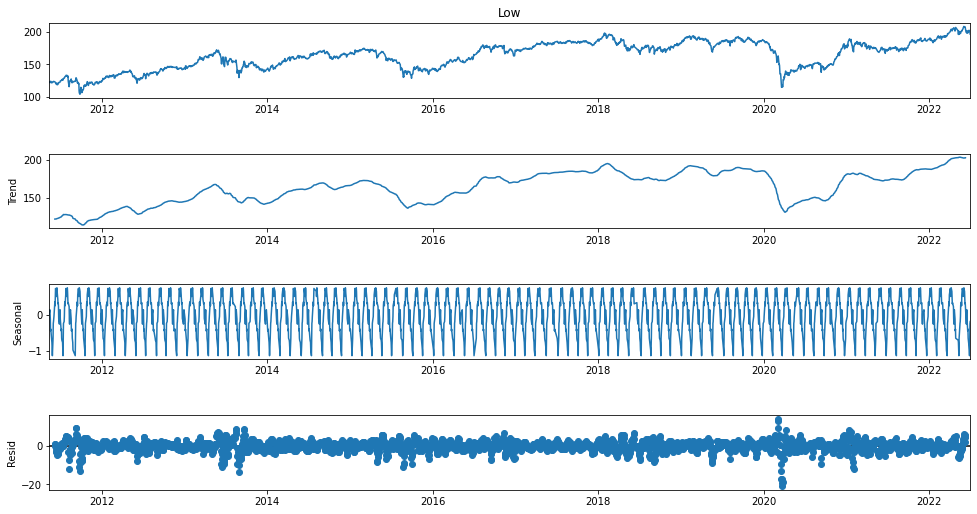

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df["Low"], period=30)
fig = decomp.plot()
fig.set_size_inches(15, 8)

In [15]:
df.head()

,Open,High,Low,Close
Date,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95
2011-05-16 15:00:00,122.03,122.94,121.59,122.03
2011-05-18 15:00:00,123.46,123.59,122.07,123.46
2011-05-19 15:00:00,123.81,124.16,123.44,123.81
2011-05-20 15:00:00,124.84,124.84,123.82,124.84


In [16]:
df.shape

(2683, 4)

(17897.0, 18628.0)

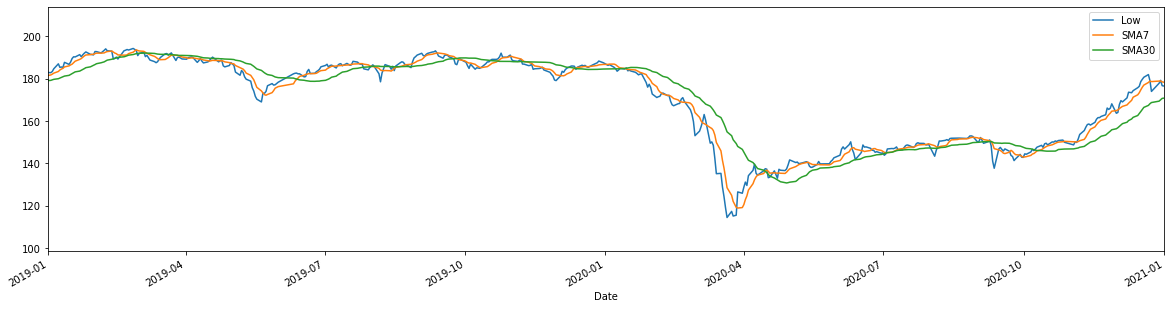

In [17]:
df["SMA7"] = df["Low"].rolling(7).mean()
df["SMA30"] = df["Low"].rolling(30).mean()
df["SMA90"] = df["Low"].rolling(90).mean()
df["SMA180"] = df["Low"].rolling(180).mean()

df[["Low", "SMA7", "SMA30"]].plot(figsize=(20, 5))
plt.xlim("2019-01-01", "2021-01-01")

<AxesSubplot: xlabel='Date'>

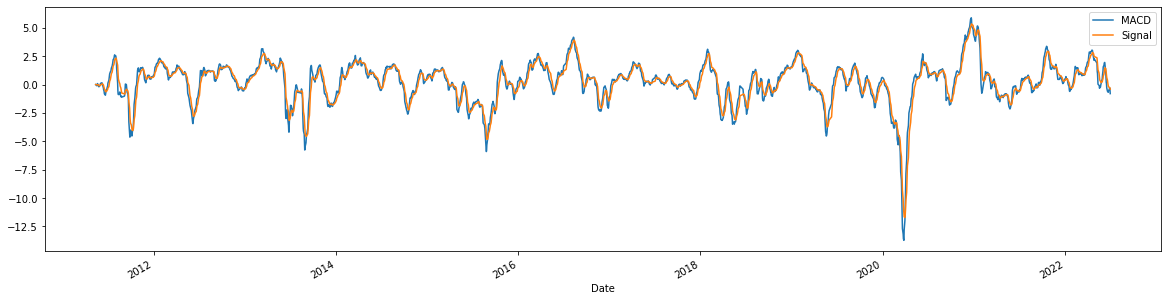

In [18]:
# calculate MACD
df["EMA12"] = df["Low"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["Low"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA12"] - df["EMA26"]

# calculate signal line
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

# plot MACD
df[["MACD", "Signal"]].plot(figsize=(20, 5))

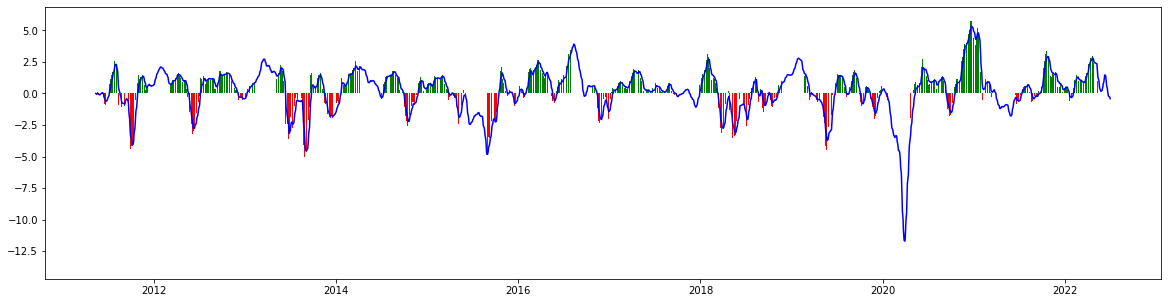

In [19]:
color = np.array(['green']*len(df))
fig, ax = plt.subplots(figsize=(20, 5))
color[df["MACD"] <0 ] = 'red'
plt.bar(df.index, df["MACD"], color=color)
plt.plot(df.index, df["Signal"], color="blue")
plt.show()


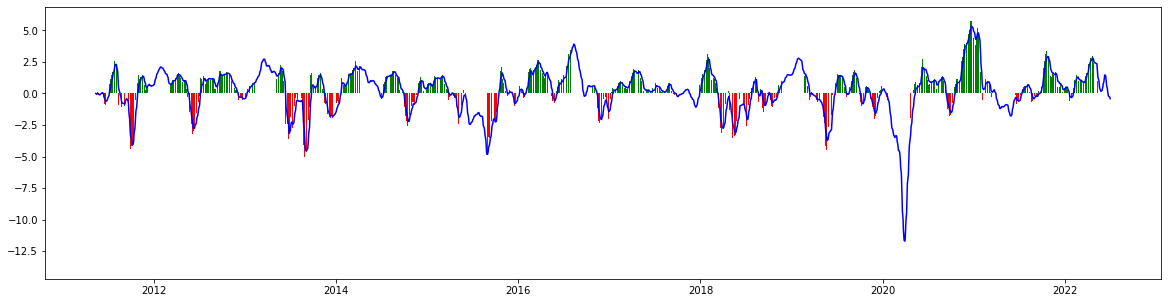

In [20]:
color = np.array(['green']*len(df))
fig, ax = plt.subplots(figsize=(20, 5))
color[df["MACD"] <0 ] = 'red'
plt.bar(df.index, df["MACD"], color=color)
plt.plot(df.index, df["Signal"], color="blue")
plt.show()

In [21]:
df["Signal"].sample(10)

Date
2012-09-12 15:00:00    0.618154
2014-10-01 15:00:00   -0.189049
2012-10-01 15:00:00    1.427754
2017-03-03 15:00:00    0.552569
2011-12-07 15:00:00    0.566910
2019-09-19 15:00:00    1.402656
2016-11-23 15:00:00   -1.752362
2013-02-28 15:00:00    1.590559
2016-01-14 15:00:00    0.336520
2016-02-19 15:00:00    1.748788
Name: Signal, dtype: float64

In [22]:
df.sample(10)

,Open,High,Low,Close,SMA7,SMA30,SMA90,SMA180,EMA12,EMA26,MACD,Signal
Date,,,,,,,,,,,,
2012-12-11 15:00:00,145.23,145.41,144.15,145.23,143.417143,144.916667,141.838667,137.682222,143.907228,144.266140,-0.358912,-0.302898
2021-05-19 15:00:00,171.75,172.19,169.68,170.13,172.860000,175.428000,179.456778,168.105333,173.283970,174.936836,-1.652866,-1.149990
2018-10-02 15:00:00,177.33,177.82,174.85,175.23,175.402857,174.277333,174.523222,181.360222,174.898046,174.471080,0.426966,0.023760
2020-09-15 15:00:00,149.61,150.10,147.50,147.96,146.042857,149.494333,146.418444,152.964778,147.249900,148.466373,-1.216473,-0.401410
2021-07-01 15:00:00,172.43,173.67,171.63,173.23,171.720000,172.030333,176.280333,172.088667,171.661618,172.281520,-0.619903,-0.600604
2015-12-15 15:00:00,137.50,137.50,136.05,137.50,138.391429,141.082000,140.346444,151.800944,138.972120,140.290923,-1.318803,-0.558674
2013-10-09 15:00:00,149.82,150.20,147.86,149.82,146.702857,145.311333,151.381556,154.922556,147.055802,146.778926,0.276875,0.416829
2019-12-18 15:00:00,186.96,187.17,186.21,187.07,185.701429,184.384000,187.299222,185.595611,185.114649,184.978598,0.136050,-0.364347
2016-12-08 15:00:00,173.43,174.44,173.24,174.44,172.077143,172.337000,175.335444,167.508833,171.506603,171.977151,-0.470549,-1.207119


In [23]:
# calculate RSI
delta = df["Low"].diff(1)
delta = delta.dropna()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
df["up"] = up
df["down"] = down
df["avg_up"] = df["up"].ewm(com=13, adjust=False).mean()
df["avg_down"] = df["down"].ewm(com=13, adjust=False).mean()
df["RS"] = df["avg_up"] / df["avg_down"]
df["RSI"] = 100.0 - (100.0 / (1.0 + df["RS"]))

<AxesSubplot: xlabel='Date'>

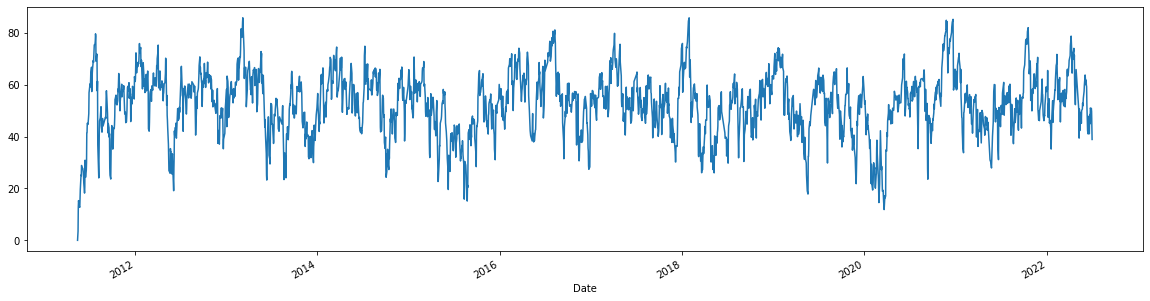

In [24]:
df["RSI"].plot(figsize=(20, 5))

In [25]:
df.head()

,Open,High,Low,Close,SMA7,SMA30,SMA90,SMA180,EMA12,EMA26,MACD,Signal,up,down,avg_up,avg_down,RS,RSI
Date,,,,,,,,,,,,,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,NaN,NaN,NaN,NaN,122.610000,122.610000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,NaN,NaN,NaN,NaN,122.453077,122.534444,-0.081368,-0.016274,0.00,1.02,0.000000,1.020000,0.000000,0.000000
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,NaN,NaN,NaN,NaN,122.394142,122.500041,-0.105899,-0.034199,0.48,-0.00,0.034286,0.947143,0.036199,3.493450
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,NaN,NaN,NaN,NaN,122.555043,122.569668,-0.014624,-0.030284,1.37,-0.00,0.129694,0.879490,0.147465,12.851365
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,NaN,NaN,NaN,NaN,122.749652,122.662285,0.087367,-0.006754,0.38,-0.00,0.147573,0.816669,0.180701,15.304549


In [26]:
df.dropna(inplace=True)

In [27]:
df.corr()

,Open,High,Low,Close,SMA7,SMA30,SMA90,SMA180,EMA12,EMA26,MACD,Signal,up,down,avg_up,avg_down,RS,RSI
Open,1.000000,0.998798,0.998444,0.997987,0.993580,0.967152,0.882946,0.771967,0.991652,0.979159,0.253506,0.271368,-0.030114,-0.050746,-0.055851,-0.241673,0.141947,0.157154
High,0.998798,1.000000,0.998167,0.998528,0.993788,0.968954,0.886866,0.776580,0.992218,0.980557,0.245403,0.263766,-0.021620,-0.043531,-0.045665,-0.226970,0.139906,0.151421
Low,0.998444,0.998167,1.000000,0.998768,0.992327,0.963900,0.878779,0.768294,0.990011,0.976480,0.263486,0.277752,-0.021907,-0.081166,-0.060395,-0.263729,0.153113,0.172539
Close,0.997987,0.998528,0.998768,1.000000,0.991850,0.965238,0.881289,0.770875,0.989952,0.977296,0.254887,0.271159,-0.011515,-0.078303,-0.051391,-0.248150,0.150498,0.166584
SMA7,0.993580,0.993788,0.992327,0.991850,1.000000,0.977848,0.894559,0.782811,0.998376,0.988658,0.227109,0.263452,-0.068798,-0.004175,-0.111950,-0.211674,0.084849,0.088932
SMA30,0.967152,0.968954,0.963900,0.965238,0.977848,1.000000,0.943233,0.832557,0.987217,0.997648,0.027554,0.083469,-0.046909,0.025421,-0.150287,-0.067214,-0.054517,-0.070025
SMA90,0.882946,0.886866,0.878779,0.881289,0.894559,0.943233,1.000000,0.937389,0.908793,0.938940,-0.176613,-0.162910,-0.025258,0.050185,-0.105359,0.096404,-0.162727,-0.191958
SMA180,0.771967,0.776580,0.768294,0.770875,0.782811,0.832557,0.937389,1.000000,0.796693,0.829394,-0.216491,-0.219981,-0.017010,0.051003,-0.067515,0.141306,-0.184348,-0.204524
EMA12,0.991652,0.992218,0.990011,0.989952,0.998376,0.987217,0.908793,0.796693,1.000000,0.994984,0.181099,0.224728,-0.061238,-0.000269,-0.121569,-0.179385,0.053514,0.052956
EMA26,0.979159,0.980557,0.976480,0.977296,0.988658,0.997648,0.938940,0.829394,0.994984,1.000000,0.081807,0.130544,-0.052723,0.017256,-0.137318,-0.105355,-0.016145,-0.026359


In [28]:
X = df.drop(columns=["Low"])
y = df["Low"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2003, 17), (501, 17), (2003,), (501,))

In [29]:
X_train

,Open,High,Close,SMA7,SMA30,SMA90,SMA180,EMA12,EMA26,MACD,Signal,up,down,avg_up,avg_down,RS,RSI
Date,,,,,,,,,,,,,,,,,
2020-06-26 15:00:00,145.58,146.88,146.26,146.488571,144.015667,143.786778,164.000556,145.923538,144.653870,1.269667,1.645991,0.27,-0.00,0.681004,0.610664,1.115186,52.722832
2013-07-12 15:00:00,156.98,158.37,156.98,152.457143,156.680667,161.305778,153.913167,153.835536,156.105228,-2.269692,-2.415357,2.41,-0.00,1.163604,1.233706,0.943178,48.537901
2020-04-20 15:00:00,138.02,138.89,136.42,135.517143,133.049000,162.251111,174.689556,134.438285,136.381639,-1.943354,-3.684915,2.97,-0.00,1.316716,1.336982,0.984842,49.618153
2020-09-23 15:00:00,145.08,146.11,144.52,145.601429,148.973000,146.751222,151.608611,145.786466,147.231320,-1.444854,-1.038642,0.00,0.50,0.685961,1.000060,0.685920,40.685198
2020-07-06 15:00:00,146.98,147.93,147.38,145.300000,145.221333,142.220778,162.664611,145.673346,144.924406,0.748940,0.986893,0.22,-0.00,0.654726,0.491516,1.332055,57.119360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 15:00:00,176.98,177.19,175.12,176.562857,174.164000,174.322000,177.009778,175.812957,174.893816,0.919141,0.907484,0.00,1.14,0.573310,0.552347,1.037952,50.931126
2016-08-29 15:00:00,179.86,180.02,177.24,177.867143,175.562000,164.101778,155.303278,177.497632,175.471823,2.025809,2.580703,0.00,2.90,0.685607,0.589656,1.162723,53.762000
2016-10-18 15:00:00,178.28,179.45,179.23,177.034286,175.921000,171.815000,162.112833,177.113075,176.597940,0.515135,0.536712,0.79,-0.00,0.591969,0.465528,1.271608,55.978314


In [30]:
y_train

Date
2020-06-26 15:00:00    145.48
2013-07-12 15:00:00    155.34
2020-04-20 15:00:00    136.42
2020-09-23 15:00:00    143.20
2020-07-06 15:00:00    146.98
                        ...  
2018-11-28 15:00:00    175.12
2016-08-29 15:00:00    176.54
2016-10-18 15:00:00    178.20
2017-06-21 15:00:00    183.17
2015-09-04 15:00:00    139.98
Name: Low, Length: 2003, dtype: float64

In [31]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'SMA7', 'SMA30', 'SMA90', 'SMA180',
       'EMA12', 'EMA26', 'MACD', 'Signal', 'up', 'down', 'avg_up', 'avg_down',
       'RS', 'RSI'],
      dtype='object')

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

preprocessor = ColumnTransformer([
    ('numeric', PolynomialFeatures(), X_train.columns),
])

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=100, n_jobs=-1, verbose=20, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'algo__max_depth': 52, 'algo__max_features': 0.1678116304055154, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 166}
0.9998379413404145 0.9984816380531875 0.9988618810940973


In [33]:
X_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)
y_train.sort_index(inplace=True)
y_test.sort_index(inplace=True)

In [34]:

# regression report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib

# make class for regression report
class regression_report:
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
    from sklearn.model_selection import cross_val_predict
    def __init__(self, X_train, X_test, y_train, y_test, model, algo):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = model
        self.algo = algo
        self.y_train_pred = pd.DataFrame(self.model.predict(self.X_train), columns=["Pred Train"], index=self.X_train.index)
        self.y_test_pred = pd.DataFrame(self.model.predict(self.X_test), columns=["Pred Test"], index=self.X_test.index)
        self.mseTrain = mean_squared_error(self.y_train, self.y_train_pred)
        self.mseTest = mean_squared_error(self.y_test, self.y_test_pred)
        self.mapeTrain = mean_absolute_percentage_error(self.y_train, self.y_train_pred)
        self.mapeTest = mean_absolute_percentage_error(self.y_test, self.y_test_pred)
        self.r2Train = r2_score(self.y_train, self.y_train_pred)
        self.r2Test = r2_score(self.y_test, self.y_test_pred)

        self.accVSpredTrain = pd.concat([self.y_train, self.y_train_pred], axis=1)
        self.accVSpredTrain["diff train"] = (np.abs(self.accVSpredTrain["Pred Train"] - self.accVSpredTrain["Low"]))*10

        self.accVSpredTest = pd.concat([self.y_test, self.y_test_pred], axis=1)
        self.accVSpredTest["diff test"] = (np.abs(self.accVSpredTest["Pred Test"] - self.accVSpredTest["Low"]))*10

        self.accVSpredFusion = pd.concat([self.accVSpredTrain, self.accVSpredTest], axis=1)

    def RealVSPredictedVisualTrain(self, title):
        fig,ax = plt.subplots()
        self.accVSpredTrain.plot(figsize=(20, 10), title="Train Data " + title, x_compat=True, ax=ax)
        ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d-%m-%Y", tz=None))
        plt.legend()
        plt.show()
    
    def RealVSPredictedVisualTest(self, title):
        fig,ax = plt.subplots()
        self.accVSpredTest.plot(figsize=(20, 10), title="Test Data " + title, x_compat=True, ax=ax)
        ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d-%m-%Y", tz=None))
        plt.legend()
        plt.show()

    def RealVSPredictedVisualFusion(self, title):
        self.accVSpredFusion.plot(figsize=(20, 10), title="Fusion " + title)
        plt.legend()
        plt.show()

    def printReport(self):
        y_train_pred = self.model.predict(self.X_train)
        y_test_pred = self.model.predict(self.X_test)
        print("Regression Report " + self.algo)
        print("MSE Train\t\t:", "{:.4f}".format (mean_squared_error(self.y_train, y_train_pred)))
        print("MSE Test\t\t:", "{:.4f}".format (mean_squared_error(self.y_test, y_test_pred)))
        print("MAPE Train\t\t:", "{:.4f}".format (mean_absolute_percentage_error(self.y_train, y_train_pred)))
        print("MAPE Test\t\t:", "{:.4f}".format (mean_absolute_percentage_error(self.y_test, y_test_pred)))
        print("R2 Train\t\t:", "{:.4f}".format (r2_score(self.y_train, y_train_pred)))
        print("R2 Test\t\t\t:", "{:.4f}".format (r2_score(self.y_test, y_test_pred)))

Regression Report Extreme Gradient Boosting 
MSE Train		: 0.0567
MSE Test		: 0.3733
MAPE Train		: 0.0009
MAPE Test		: 0.0024
R2 Train		: 0.9998
R2 Test			: 0.9989

data train
                        Low  Pred Train  diff train
Date                                               
2013-06-12 15:00:00  150.58  153.287892   27.078916
2020-03-26 15:00:00  115.48  117.413253   19.332530
2020-03-13 15:00:00  135.09  136.913012   18.230120
2020-09-11 15:00:00  137.66  139.213373   15.533735
2013-06-26 15:00:00  150.69  152.117108   14.271084

data test
                        Low   Pred Test  diff test
Date                                              
2021-02-01 15:00:00  169.36  174.318735  49.587349
2020-08-03 15:00:00  143.34  147.007651  36.676506
2018-09-05 15:00:00  165.76  169.195181  34.351807
2022-05-10 15:00:00  196.26  199.114639  28.546386
2016-06-24 15:00:00  157.36  160.107169  27.471687


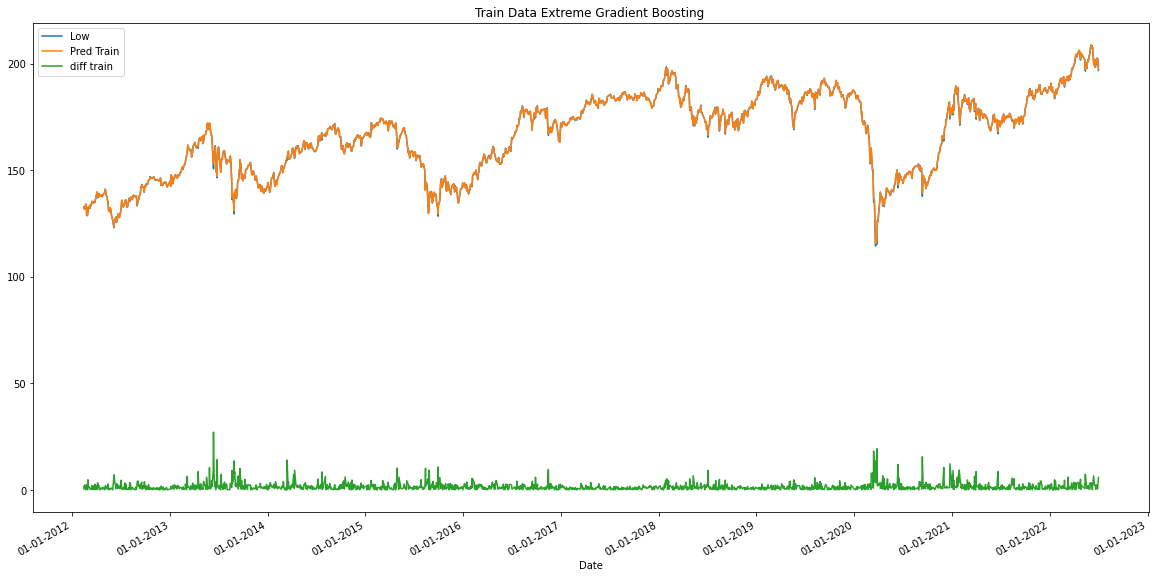

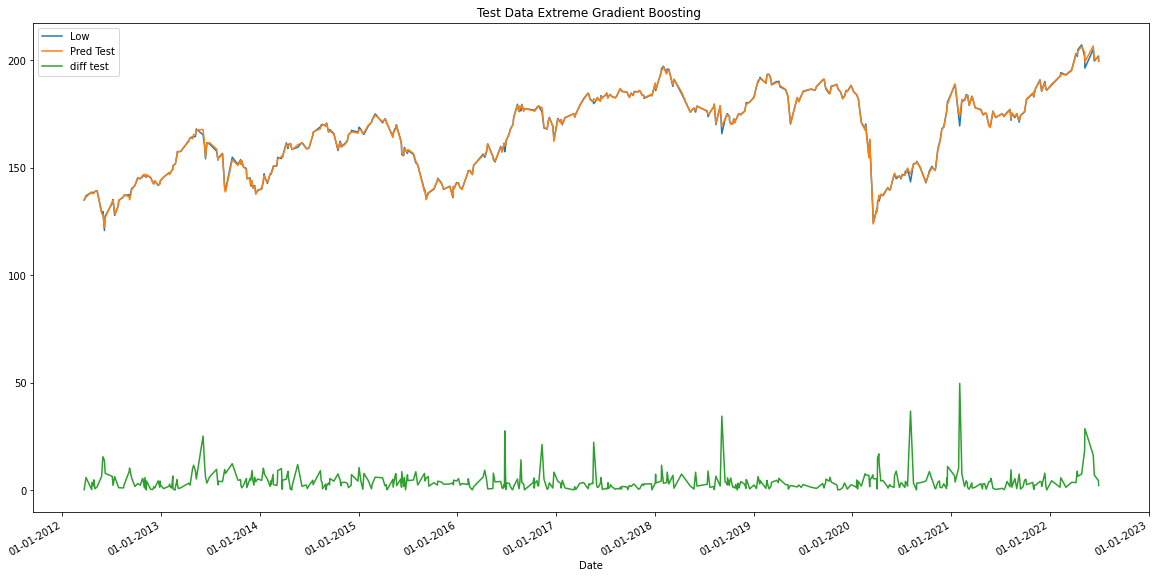

In [35]:
rr = regression_report(X_train, X_test, y_train, y_test, model, "Extreme Gradient Boosting ")
rr.printReport()

print("\ndata train")
print(rr.accVSpredTrain.sort_values(by="diff train", ascending=False).head(5)) 
print("\ndata test")
print(rr.accVSpredTest.sort_values(by="diff test", ascending=False).head(5))
# print(rr.accVSpredFusion.head(5))

rr.RealVSPredictedVisualTrain(title="Extreme Gradient Boosting ")
rr.RealVSPredictedVisualTest(title="Extreme Gradient Boosting ")

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

preprocessor = ColumnTransformer([
    ('numeric', PolynomialFeatures(), X_train.columns),
])

from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=100, n_jobs=-1, verbose=5, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'algo__colsample_bytree': 0.1826191592320977, 'algo__gamma': 1, 'algo__learning_rate': 0.04195914391541159, 'algo__max_depth': 4, 'algo__n_estimators': 168, 'algo__reg_alpha': 0.0788306878976805, 'algo__reg_lambda': 0.0024622754931226585, 'algo__subsample': 0.5458079375584162}
0.9995590810434845 0.9937907419058186 0.9988242997123359


In [37]:
regression_report(X_train, X_test, y_train, y_test, model, "XGBoost")

Regression Report Extreme Gradient Boosting 
MSE Train		: 0.1544
MSE Test		: 0.3856
MAPE Train		: 0.0019
MAPE Test		: 0.0027
R2 Train		: 0.9996
R2 Test			: 0.9988

data train
                        Low  Pred Train  diff train
Date                                               
2014-03-14 15:00:00  154.74  156.597366   18.573663
2013-05-28 15:00:00  168.92  170.625412   17.054120
2013-05-17 15:00:00  168.26  169.643509   13.835089
2014-04-07 15:00:00  159.67  160.969040   12.990399
2014-04-11 15:00:00  155.53  156.776413   12.464130

data test
                        Low   Pred Test  diff test
Date                                              
2021-02-01 15:00:00  169.36  174.223587  48.635870
2020-08-03 15:00:00  143.34  146.677994  33.379938
2013-06-04 15:00:00  165.22  167.632233  24.122327
2022-05-10 15:00:00  196.26  198.406494  21.464941
2017-05-19 15:00:00  179.74  181.874084  21.340845


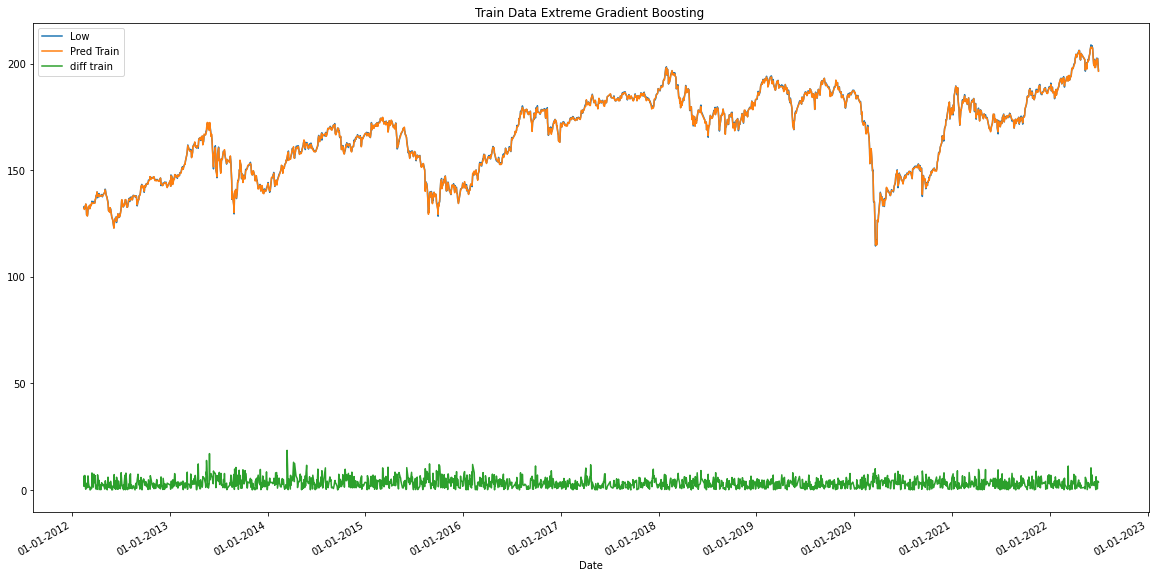

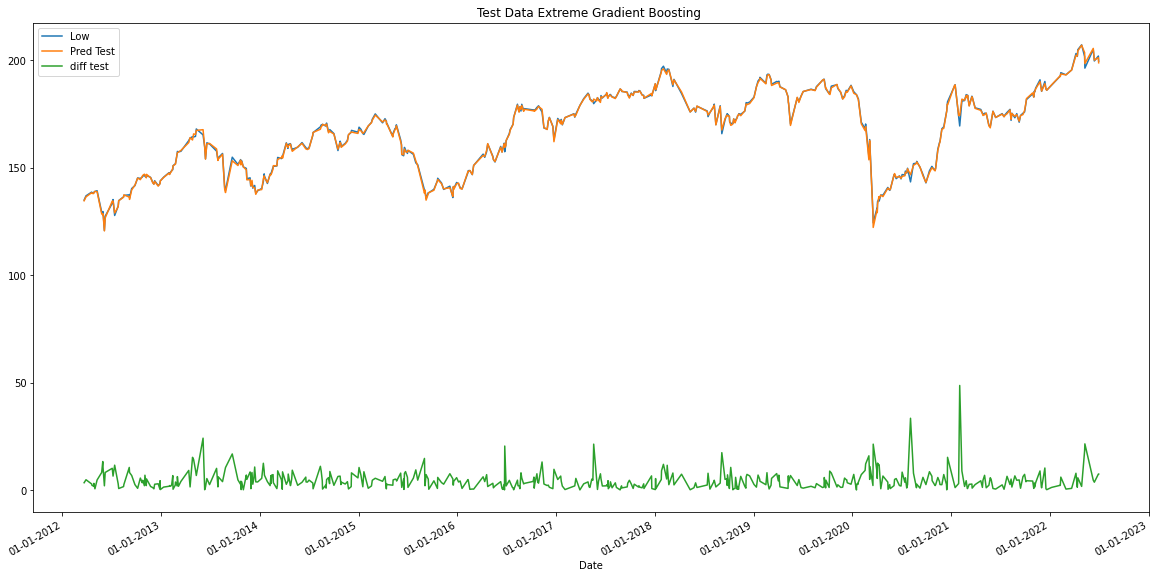

In [38]:
rr = regression_report(X_train, X_test, y_train, y_test, model, "Extreme Gradient Boosting ")
rr.printReport()

print("\ndata train")
print(rr.accVSpredTrain.sort_values(by="diff train", ascending=False).head(5)) 
print("\ndata test")
print(rr.accVSpredTest.sort_values(by="diff test", ascending=False).head(5))
# print(rr.accVSpredFusion.head(5))

rr.RealVSPredictedVisualTrain(title="Extreme Gradient Boosting ")
rr.RealVSPredictedVisualTest(title="Extreme Gradient Boosting ")

In [4]:
4%12

4

In [8]:
scores = [10,5,20,20,4,5,2,25,1]

In [17]:
tempMax = scores[0]
tempMin = scores[0]

max = 0
min = 0
for i in range(0, len(scores)):
    if i != len(scores)-1:
        if tempMax < scores[i+1]:
            tempMax = scores[i+1]
            max = max + 1
            print("max", max)
        elif tempMin > scores[i+1]:
            tempMin = scores[i+1]
            min = min + 1
            print("min", min)

min 1
max 1
min 2
min 3
max 2
min 4


# Feature Importance 

### RF

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### XGB

In [ ]:
from xgboost import plot_importance, plot_tree
import xgboost as xgb
plot_importance(model);